<a href="https://colab.research.google.com/github/mo3tawesome/TweetsClassifier/blob/master/CNNvsLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving offenseval-training-v1.tsv to offenseval-training-v1.tsv


Word 

In [0]:
import numpy as np
from keras.models import Sequential
from keras import layers
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
with open('offenseval-training-v1.tsv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f, dialect='excel', delimiter='\t')
    results = [] #tsv file 0:id, 1:sentence, 2: off/not
    sentences = []
    lables = []
    for row in reader:
        results.append(row)
        sentences.append(row[1])
        lables.append(row[2])
print(results[1][1])
count=0
removal_list = ["@USER","URL"]
import re
for sentence in sentences:
  edit_string_as_list = sentence.split()
  final_list = [word for word in edit_string_as_list if word not in removal_list]
  final_string = ' '.join(final_list)
  final_string = final_string.replace("#", "")
  #final_string = re.sub("^[a-z][a-z\s]*$", "", final_string) #remove non word chars
  sentences[count]=final_string.lower()
  count+=1


sentences_train, sentences_test_validate, y_train, y_test_validate = train_test_split( sentences, lables, test_size=0.4, random_state=1000)
sentences_test, sentences_validate, y_test, y_validate = train_test_split( sentences_test_validate, y_test_validate, test_size=0.5, random_state=1000)
print(len(y_train))
print(len(y_test))
print(len(y_validate))

from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_validate = tokenizer.texts_to_sequences(sentences_validate)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(sentences_train[2])
print(X_train[2])

from keras.preprocessing.sequence import pad_sequences
maxlen = 140
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
X_validate = pad_sequences(X_validate, padding='post', maxlen=maxlen)
print(X_train[0, :])

count=0;
for i in y_train:
  if(i=="OFF"):
    y_train[count]=0
  else:
    y_train[count]=1
  count+=1
print(y_train)
count=0;
for i in y_test:
  if(i=="OFF"):
    y_test[count]=0
  else:
    y_test[count]=1
  count+=1
print(y_test)
count=0;
for i in y_validate:
  if(i=="OFF"):
    y_validate[count]=0
  else:
    y_validate[count]=1
  count+=1
print(y_test)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1] )) 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1] ))
X_validate = np.reshape(X_validate,(X_validate.shape[0],X_validate.shape[1] ))

from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=2,
                    verbose=False,
                    validation_data=(X_validate, y_validate),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
#plot_history(history)

@USER She should ask a few native Americans what their take on this is.
7944
2648
2649
they’re abso shite quality tho
[828, 4736, 3687, 2589, 829]
[  15    2    3   60   12    1  596  129   68 1698    8 4735  739   55
 1316 2294    1 2295  877   13   16  134   55   39   55 1699    2    9
  163 3032   51   72    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
[1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

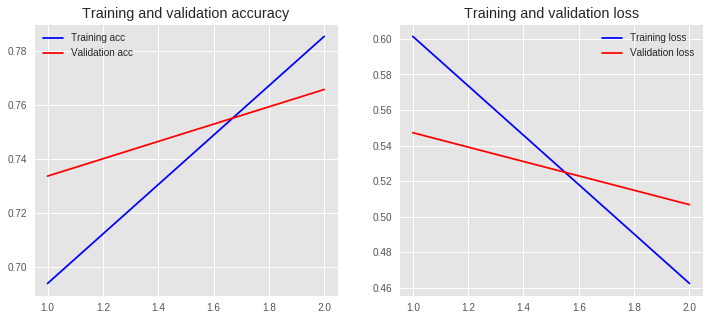

In [0]:
 plot_history(history)

DNN

In [0]:
import numpy as np
from keras.models import Sequential
from keras import layers
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
with open('offenseval-training-v1.tsv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f, dialect='excel', delimiter='\t')
    results = [] #tsv file 0:id, 1:sentence, 2: off/not
    sentences = []
    lables = []
    for row in reader:
        results.append(row)
        sentences.append(row[1])
        lables.append(row[2])
print(results[1][1])
count=0
removal_list = ["@USER","URL"]
import re
for sentence in sentences:
  edit_string_as_list = sentence.split()
  final_list = [word for word in edit_string_as_list if word not in removal_list]
  final_string = ' '.join(final_list)
  final_string = final_string.replace("#", "")
  #final_string = re.sub("^[a-z][a-z\s]*$", "", final_string) #remove non word chars
  sentences[count]=final_string.lower()
  count+=1

y = lables
sentences_train, sentences_test, y_train, y_test = train_test_split( sentences, y, test_size=0.2, random_state=1000)

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences)
vectorizer.vocabulary_
vectorizer.transform(sentences).toarray() 


vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

count=0;
for i in y_train:
  if(i=="OFF"):
    y_train[count]=0
  else:
    y_train[count]=1
  count+=1
print(y_train)
count=0;
for i in y_test:
  if(i=="OFF"):
    y_test[count]=0
  else:
    y_test[count]=1
  count+=1
print(y_test)

input_dim = X_train.shape[1]  # Number of features
print(input_dim)
model1 = Sequential()
model1.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1] )) 
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1] )) 


history = model1.fit(X_train,y_train,epochs=1,verbose=False,validation_data=(X_test, y_test),batch_size=50)

loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


@USER She should ask a few native Americans what their take on this is.
[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

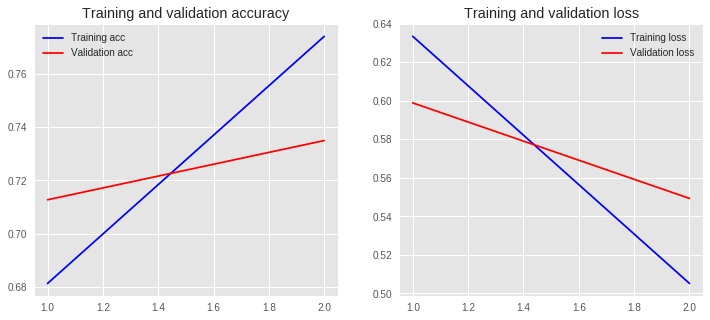

In [0]:
 plot_history(history)

In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_keras = model.predict(X_test).ravel()
kerasauc = roc_auc_score(y_test, model.predict(X_test).ravel())
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
y_pred_keras1 = model1.predict(X_test).ravel()
kerasauc1 = roc_auc_score(y_test, model1.predict(X_test).ravel())
fpr_keras1, tpr_keras1, thresholds_keras1 = roc_curve(y_test, y_pred_keras1)

NameError: ignored

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras1 = auc(fpr_keras1, tpr_keras1)

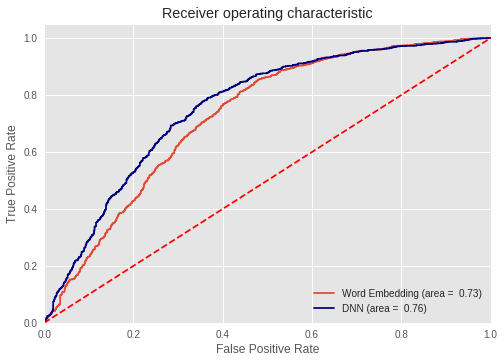

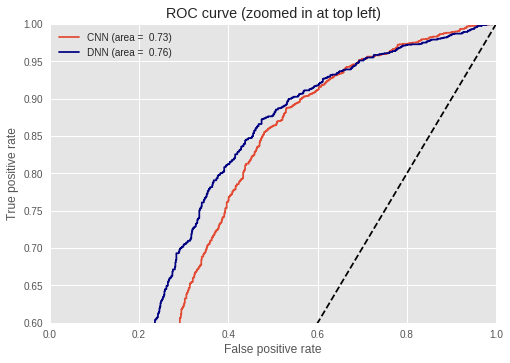

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure(1)
plt.plot(fpr_keras, tpr_keras, label='Word Embedding (area =  %0.2f)'%kerasauc)
plt.plot(fpr_keras1, tpr_keras1,color='navy', label='DNN (area =  %0.2f)'%kerasauc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
plt.figure()
plt.xlim(0, 1)
plt.ylim(0.6, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='CNN (area =  %0.2f)'%kerasauc)
plt.plot(fpr_keras1, tpr_keras1,color='navy', label='DNN (area =  %0.2f)'%kerasauc1)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()